# COMM313 Final Project

## Computational Text Analysis of #MeToo Movement Rhetoric
### Anna Callahan
### 10 May 2019

-----------


# Setup

In [94]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk import pos_tag
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import os
import zipfile
import json
import random
import datetime as dt
import calendar

%run functions-prez.ipynb

In [95]:
%run data_setup.ipynb

Extracting the-new-york-times-brett-kavanaugh_-the-4b265d24-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-judge-says-that-4b08f68a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ryan-seacrest-interviews-4aee6ac2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-suit-tests-instagram-49ee40a2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-weinstein-hires-a-49b4971c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-michael-avenatti’s-biggest-4ac54c96-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-jewish-crossroads-4a030776-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-silence-of-4967c856-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-cosby-verdict-is-498b5910-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-u.n.-cases-read-4afb8f0e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-of-vampires-and-4a3f6522-58f1-11e9-a271-0242ac130002.txt
Extra

Extracting the-new-york-times-garrison-keillor’s-accuser-4ace7082-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-women’s-march-2018_-4ae24634-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-uma-thurman-calls-4a6fbb96-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-pro-life-movement’s-4987b260-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-shame-of-49f8ce3c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-powerful-hollywood-women-49a77050-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-new-york-police-4a2f90ac-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-runners-up-from-our-4a0b4b84-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ad-agencies’-reckoning-49a3330a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-can-the-nobel-4a5132e8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-nafta_-brett-kavanaugh_-4a71f578-58f1-11e9-a271-0242ac130002

Extracting the-new-york-times-i’m-not-convinced-4a639ec4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-david-boies-pleads-4afe0522-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-many-accusations_-few-4ab6755e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-netflix-executive-loses-4a75f40c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-cosby-prosecutors-want-49b5d4d8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-weinstein-in-handcuffs-49a49f56-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_i-loved-the-4a0c2a7c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-trump-and-the-49d31980-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-list-of-accusers-4a74b628-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-‘clearly-the-tide-4a07c6c6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-where’s-harvey_-4a36cd86-58f1-11e9-a271-0242ac130002.txt
Extracting t

Extracting fox-news-network-brett-kavanaugh_s-supreme-4c8f31ea-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-supreme-court-in-4bb66432-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump_s-vegas-rally-4c5197ea-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-doris-4c844410-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-former-4c20dc2c-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump-making-new-4bf24baa-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-2020-preview_-trump-4ba555de-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-gop-senate-leaders-4c7736ee-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-pres.-trump_s-va-4c16f180-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-texas-senate-battle_-4c041c04-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-sen.-4cb38a18-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-n

Extracting the-new-york-times-it_s-mueller-who_s-4d03368a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-right-and-left-503dc810-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-return-of-4fc3391a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-julian-niccolini_-face-4fcbf136-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-accused-assaulter_s-tale-4d50300c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-women-fighting-sexism-4ff27d4c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-a-superstar-513327e2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-dating-after-_metoo-4f4b04f4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-to-weaken-rape-4d99b132-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-state-senate’s-new-508fe08c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-sag-awards-2018_-5022ad14-58f1-11e9-a271-0242ac130002.txt
Extracting the-

Extracting the-new-york-times-delay-the-vote-4fa94a64-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-two-_metoo-milestones_-50e355d2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-seth-meyers’s-golden-50b10d2a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-democrats-foresee-a-4fe42aa8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-on-the-golden-50976bcc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-accused-harassers-counting-4fd4d760-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-_metoo-moment_-4f79157e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-‘shocking-and-abhorrent’-4ec2e6fa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-france_-accusation-4eaa04a0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-gillibrand-tacks-left_-4d8491c6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-jerusalem_-harvey-weinstein_-50d2e06c-58f1-11e9-a27

Extracting the-new-york-times-judge-dismisses-lawsuit-50b38bea-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-making-a-case-4d1ee088-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-to-beat-trump_-50912122-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-making-movies-after-4ea33508-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-right-and-left-4fd6249e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-trump-sexual-misconduct-4d3a29f6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bitter-tenor-of-4d5e862a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-times’s-reporting-4e06576a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-f.b.i._-stormy-daniels_-50eae112-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-the-age-4e70a282-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-pastor-in-_metoo-511e4106-58f1-11e9-a271-0242ac130002.txt
Extracting the-ne

Extracting the-new-york-times-the-perils-of-513dfb4a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-report-finds-misconduct-4d78aa3c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-paula-jones_-reconsidered_-4f16fbdc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-janelle-monáe-brings-4e57390a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-post-weinstein_-what_s-different_-4f1a53fe-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-union-is-formed-50d61d90-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-james-toback-and-50a0c0fa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-facebook-calms-concerns-5026cd7c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-comedy-clubs-are-511b18fa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-a-female-professor_-4f980e66-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-reactions-to-cosby-4eae21a2-58f1-11e9-a271-024

Extracting the-new-york-times-better-days-for-4d9e98a0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-addressing-the-personas-4f56f62e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-rape-charges-filed-4fadbf40-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_the-silence-breakers_-5111fd06-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-11-of-our-50bb5a6e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-your-monday-news-4df82e74-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-haiti-bars-oxfam-50aa4148-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-huawei_-naomi-osaka_-4fb8ce80-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-france’s-new-michelin-4e11b7ae-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bill-clinton-signs-5053039c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-l.a.-times-forms-4ce3ef1e-58f1-11e9-a271-0242ac130002.txt
Extracting the

Extracting the-new-york-times-did-_metoo-forget-4e9a3962-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-who-will-judge-4cfc89f2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-dancer-resigns-under-4ed4404e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-where’s-harvey_-4f9e420e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-abbi-jacobson-discovers-5007e5b0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ryan-seacrest-could-4ea46838-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-‘this-is-mine’_-4d0bd038-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-trailers-of-the-506c7412-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-will-harvey-weinstein’s-4de9abf6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-she-speaks-truth-4f80e330-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-live-event_-technology’s-4fa3cc60-58f1-11e9-a271-0242ac130002.txt
Extract

Extracting fox-news-network-trump-fights-back-524eebe8-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-senator-524ab924-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-piers-morgan-is-51f12288-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-new-migrant-caravan-51ce802a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump-optimistic-about-51f7d902-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-the-_me-too_-526648b0-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-tucker_-i.g.-report-51e1c50e-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-the-media_s-lover-522c09d4-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-democrats-and-liberal-51f3a90e-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-congressman-keith-ellison-51fa722a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-media-frenzy-over-51b86a9c-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-netw

Extracting the-new-york-times-the-taliban_-khashoggi_-4483db36-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-how-the-finance-4263cbea-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-jury-finally-4427df70-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-domestic-violence-awareness-42421630-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-south-korea’s-_metoo-443f934a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bill-cosby-returns-42464d68-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-prosecutor-won_t-charge-44e7eb9e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-where-are-all-4355ede4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-canadian-olympic-success_-44e5294a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-norm-macdonald-apologizes-43f523f0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-your-wednesday-news-41de8ae8-58f1-11e9-a271-0

Extracting the-new-york-times-sex-crime-reports-42543a72-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-r.i.p.-ivanka-inc.-43d23a48-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bill-cosby-jury-4451026a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bill-cosby_-once-41dbfcb0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-spotify-is-getting-447e1890-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-5-men-in-43118bfe-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-sexual-harassment-claims-446d3caa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-texas-attorney-general’s-44b81446-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-came-to-432047de-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-weinstein-begins-casting-44adcd74-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-20-years-later_-450d948e-58f1-11e9-a271-0242ac130002.txt
Extracting the-

Extracting the-new-york-times-norm-macdonald-apologizes-42cd4552-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_iamsexist_-the-stone-4267ad1e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-a-crisis-management-4172d942-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-arrest-record-of-4493aff2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-a-_metoo-story-4343d3b6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-one-year-after-418e1d10-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-it_s-mueller-who_s-418f737c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-12.31.2017-issue-42a84dd8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-at-the-4498a246-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-woody-allen-meets-444169d6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-brooklyn-rape-victim-42da78c6-58f1-11e9-a271-0242ac130002.txt
Extracting 

Extracting the-new-york-times-can-she-fix-427bcf88-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-david-daniels_-opera-42ddba0e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-return-of-42ad8834-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-do-you-buy-428b40c6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-how-‘chappelle’s-show’-4363d1b6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-michael-cohen_-germany_-41ba5560-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-for-glenn-close_-44c94612-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-an-injudicious-man_-43143624-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-mahmoud-abbas_-donald-43d4b55c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-women-seeking-a-44ea16b2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-megan-fox-excavates-45040a18-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-

Extracting the-new-york-times-evangelical-congregations-seek-42b994ee-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ad-warns-riders-444ac68e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-has-_metoo-gone-42ebe278-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-weinstein-faces-new-45107a50-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-politics-of-42019254-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-makes-czech-42585864-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-trump-adviser-cites-4196cd5c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-morgan-freeman’s-team-43730848-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-saudi-arabia_-paul-450669b6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-rose-mcgowan-says-41ace272-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-telling-her-story-44116042-58f1-11e9-a271-0242ac130002.txt
Extr

Extracting the-new-york-times-a-predatory-congressman_-43f02f9e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-catherine-deneuve-and-445f16c0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-floods-social-41e82a26-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-california-today_-fears-44af6724-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_350-fine-for-4480d8b4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-feminists-and-43914ba0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-robert-mueller_-davos_-421595ba-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-sexual-assault-on-42e3e94c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-asia-argento_-a-443823a8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-courts-must-better-4244ecc0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-south-korean-church-42faac40-58f1-11e9-a271-0242ac130002.txt

Extracting fox-news-network-congressman-keith-ellison-46313d98-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-hawaii-volcano_-election-45a0a65c-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-media-politicization_-self-centered-468becfc-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-the-democrats-and-46fee2de-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-franken-faces-sexual-46ae3578-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-former-nbc-producer_-46bf6a78-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-harvey-weinstein-charged-46da601c-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-secret-society-details-45d4b988-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-giuliani-says-special-4666c076-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-weaponizing-the-_metoo-45e23388-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-senate-judiciary-extends-467d5778-58f1-11e

Extracting the-new-york-times-police-maligned-rape-546c4650-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-what-we’re-reading-53d14466-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-arrested-on-rape-52e441d4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-children_s-book-sector-54852e4a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-who-gets-a-54a17dac-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-tycoon_s-rape-case-53115be2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-these-movies-haunted-536802bc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-how-mexican-directors-5369e85c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-‘the-women’s-war’-54fbb77c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-response-to-french-5499a5be-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-taking-a-new-5433607e-58f1-11e9-a271-0242ac130002.txt
Extracting the-n

Extracting the-new-york-times-minnie-driver-calls-52f541fa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-rose-mcgowan-and-547a1bcc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-these-aren’t-fashion-53e401aa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-time’s-up-co-founder-53f5d808-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-listen-and-verify-52f27768-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-deep-dives-into-53848658-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bill-cosby-returns-53f3be9c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-two-face-accusations-52cb7988-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-cannes_-where-weinstein-5346581a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-conversation_-seven-54ade34e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-review_-taming-‘the-533d6b60-58f1-11e9-a271-0242ac130002.tx

Extracting the-new-york-times-indian-cabinet-minister-5307fbb0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-thai-paradise-gains-548c8d02-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-churches-can-no-52a1f0e0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-i-believe-juanita_-532d4726-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-an-account-of-52ce05e0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-review_-‘good-girls’-54a6a6f6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-music-mogul-russell-537b458e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-blockbusters_-_metoo-and-540c9b10-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-only-hollywood-53b9dbc8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-chorus-of-544d25fe-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-kavanaugh-is-sworn-530240b2-58f1-11e9-a271-0242ac130002.txt
Extracti

Extracting fox-news-network-the-fbi-supplemental-55f2c742-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-fisa-documents-declassified_-55f45e9a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-brett-kavanaugh_-in-5618ba38-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-under-consideration_-justice-55c951be-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-rep.-steve-scalise-5562397a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-false-missile-alert-55b75810-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-rachel-mitchell-reports-55644404-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump-fights-back-55704736-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-actor-matt-damon-55669cb8-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-sarah-5612c862-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-new-indications-how-555ff11a-58f1-11e9-a271-0242ac130002.txt
Ext

Extracting the-new-york-times-what-motivates-your-474dc0d4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-terry-crews-won’t-484de428-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-california-today_-what-47646e1a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-r.-kelly-charged-47a23948-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-stories-on-the-479f39d2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-is-a-487e6f58-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-catalonia_-brexit_-harvey-47d0d80c-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-louis-c.k.-welcome_-47e83a56-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-hollywood_s-protest-problem-476b3ca4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-bryan-singer-to-4893b20a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-why-isn’t-rape-47c3bbae-58f1-11e9-a271-0242ac130002.txt
Extractin

Extracting the-new-york-times-why-we’re-writing-47ecf9ce-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-what-to-do-4790f9e4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-canada_-a-481392dc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-potential-cosby-jurors-47d84650-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-elizabeth-esty_-saying-47d451e4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-one-after-another_-485557b2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-here-are-the-47e2bc98-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-rape-jokes-4772a9a8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-jude-law_-on-4838db6e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-fight-over-kavanaugh-4832ecfe-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-les-moonves-obstructed-48210656-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-tim

Extracting fox-news-network-texas-senate-battle_-48fc16ce-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-mid-term-elections-coming-48fe5236-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-rep.-steve-scalise-4938734e-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-rep.-48f5535c-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-ag-sessions-says-49274e7a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-atlanta-hartsfield-airport-48cfaecc-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-at-least-four-49152b32-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-the-democrats-and-490b40f4-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-chris-hayes-hosted-4931cbf2-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-virginia-democrats_-hypocrisy_-490f9ed8-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-president-trump-visits-491dd340-58f1-11e9-a271-0242ac130002.txt
Extrac

Extracting the-new-york-times-time’s-up-co-founder-586de5d8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-saudi-arabia_-paul-59cc0f5e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-tariffs_-italy_-syria_-598afdc0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-i-stand-with-5ad77546-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-go-ahead_-criticize-5a10b01e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-listen-to-‘the-56f42154-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-war-for-5b3565ac-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-brown-signs-off_-5ae6efee-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-now-comes-the-5adb5f80-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-predators-in-58b0729a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-when-a-black-57b306fa-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-your-

Extracting the-new-york-times-terry-crews-and-5b13bcea-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-r.-kelly-sued-576db4b0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-as-_metoo-closes-5a79a7cc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-do-character-issues-5a387086-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-reporting-by-the-5769ec90-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-must-writers-be-57768fae-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-jury-finally-5bd141b6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-sexual-harassment-training-5737ccba-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-rex-tillerson_-nerve-5a4118f8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-rudy-giuliani_-north-5b7aa3a6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-trump_s-nominee-vows-56edec76-58f1-11e9-a271-0242ac130002.txt
Extracting t

Extracting the-new-york-times-spanish-officials-defend-592531de-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-and-law_s-577d1b12-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_bully-boy-culture_-57c09c48-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-lie-back-and-5badd398-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-2nd-apology-by-59effd6a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-getting-real-about-57da5412-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-aziz-ansari-is-5b508864-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-dear-film-industry_-5a0b4052-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-hollywood_-another-571a8ee8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-general-motors_-migrants_-5c2d35f2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-students-defiant-as-5b4a355e-58f1-11e9-a271-0242ac130002.txt
Extract

Extracting the-new-york-times-singer-files-police-5a3a9492-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo-and-the-5a8764ac-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-uma-thurman-calls-5b8bdb12-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-_metoo_-black-friday_-58ffb0f8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-senate-votes-50-48-57de0d6e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-california-today_-2-5b0d9126-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-do-i-have-5bf49c7e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-new-york_-5a2300fc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-a-stand-up_s-big-5b1e2d42-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-big-business-575dd4dc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-on-politics-with-56e7942a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-s

Extracting the-new-york-times-toppled-by-abuse-5883c740-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-brett-kavanaugh_-bill-59a49ea6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-dealbook-briefing_-the-5bbba248-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-from-the-summit-56d109f8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-‘sick-with-sexism_’-5adf92ee-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-mario-batali-steps-580da39e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-cosby-retrial_-574b515e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-louis-c.k.-performs-5a450224-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-at-yale_-students-5a0089dc-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-prosecuting-r.-kelly-568fb552-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-luc-besson_-french-5bf516fe-58f1-11e9-a271-0242ac130002.txt
Extrac

Extracting the-new-york-times-heitkamp-rebukes-senate-5c2c5100-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-r.-kelly-has-572a2ea2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-prosecutor-won_t-charge-570f5168-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-susan-collins_-standing-58658668-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-top-dutch-orchestra-5a792536-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-at-sentencing-hearing_-5ad8cc7a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-how-to-make-59ecb858-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-for-egypt_-a-5bd42fe8-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-why-there-won’t-57847ec0-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-david-boies-pleads-56b2e4d2-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-terry-crews-won_t-5a0e74fc-58f1-11e9-a271-0242ac130002.txt
Extracting th

Extracting the-new-york-times-timely-advice_-_don_t-573a7a5a-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-andrea-constand_s-victim-5ae3a6d6-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-flashback_-the-anita-5816d806-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-a-highly-publicized-5953ab40-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-your-wednesday-evening-5b7c198e-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-the-long-year-591bc360-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ming-peiffer_-why-573d41f4-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-ontario’s-opposition-leader-5c165774-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-women-take-lead-5a3ce076-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-in-house-race_-58461878-58f1-11e9-a271-0242ac130002.txt
Extracting the-new-york-times-hearing-set-for-59a76866-58f1-11e9-a271-0242ac130002.txt
E

Extracting fox-news-network-trump-tweets-endorsement-5e2e0174-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-democrats-in-disarray_-5e83b6c8-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-interview-with-doris-5da2a5a2-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-deputy-attorney-general-5d3edc84-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump-serves-food-5d8b18d8-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network---interview-5d122ffe-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-gop-women-could-5e5cdb7a-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-trump-asks-turkey-5d71de54-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-president-trump-walks-5d7efc06-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-false-missile-alert-5dd2f50e-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news-network-weaponizing-the-_metoo-5d196dd2-58f1-11e9-a271-0242ac130002.txt
Extracting fox-news

# Temporal Analysis of Data

In [96]:
years=[]
months=[]
days=[]
publications=[]
sections=[]

for text in corpus:
    
    dobj = dt.datetime.strptime(text['Date'],'%Y-%m-%d')
    y=dobj.year
    m=calendar.month_name[dobj.month]
    d=calendar.day_name[dobj.weekday()]
    
    years.append(y)
    months.append(m)
    days.append(d)
    
    pub = text["Publication"]
    sec = text["Section"]
    
    publications.append(pub)
    sections.append(sec)

In [97]:
Counter(years).most_common()

[(2018, 5149), (2019, 799), (2017, 789)]

In [98]:
Counter(months).most_common()

[('September', 944),
 ('October', 875),
 ('January', 849),
 ('December', 709),
 ('February', 647),
 ('March', 550),
 ('May', 504),
 ('April', 501),
 ('November', 376),
 ('August', 326),
 ('June', 246),
 ('July', 210)]

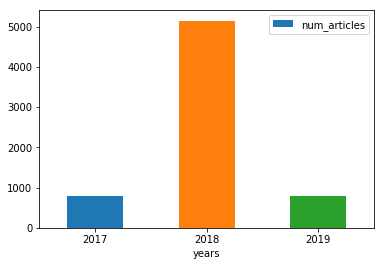

In [99]:
df = pd.DataFrame({'years':[2017, 2018, 2019], 'num_articles':[789, 5149, 799]})
ax = df.plot.bar(x='years', y='num_articles', rot=0)

# Tokenization

In [100]:
for article in corpus:
    filename = article['Filename']
    text = open('data/text/{}'.format(filename)).read()
    article['text'] = text

In [101]:
characters_to_remove = '!,.()[]"'
corpus_token_cnt = 0

for article in corpus:
    text = article["text"]
    tokens = tokenize(text, lowercase=True, strip_chars=characters_to_remove)
    
    token_cnt = len(tokens)
    
    article['tokens'] = tokens
    
    corpus_token_cnt += token_cnt

print("There are", corpus_token_cnt, "unique tokens in this corpus.")

There are 13817697 unique tokens in this corpus.


In [102]:
corpus[0]

{'Filename': 'the-new-york-times-hearing-set-for-4958142e-58f1-11e9-a271-0242ac130002.txt',
 'Publication': 'The New York Times',
 'Section': 'US; politics',
 'Date': '2018-09-17',
 'Title': 'Hearing Set for Monday to Hear Kavanaugh and His  Accuser',
 'Author': 'Sheryl Gay Stolberg and Julie Hirschfeld Davis',
 'LNID': '02A6A252C52394AB97B14672E56C2F2F53468850A86AD8BC534837F7C9F7357EEC6475A7810729DD190ACCBF85F1AD407673C48680DCAF8F2F020D1457CE182DCF4D8609C8B271CCB8926AF9F1DB8FF9C45D84D980EEB0A36B8BEB5732BEB6B1C414CD5D347A9C3A95A5888E4C074061',
 'text': 'WASHINGTON — The chairman of the Senate Judiciary Committee, under mounting pressure from senators of his own party, will call President Trump’s Supreme Court nominee, Judge Brett M. Kavanaugh, and the woman who has accused him of sexual assault before the committee on Monday for extraordinary public hearings only weeks before the midterm elections.\n\nIn setting the hearing, Senator Charles E. Grassley, Republican of Iowa, backed down 

#### Divide the main corpus (now including full text and tokens for each article) into NYT and FOX corpora

In [103]:
nyt_corpus = []
fox_corpus = []

for text in corpus:
    if text['Publication'] == 'The New York Times':
        nyt_corpus.append(text)
    elif text['Publication'] == 'Fox News Network':
        fox_corpus.append(text)

In [104]:
nyt_corpus[0]

{'Filename': 'the-new-york-times-hearing-set-for-4958142e-58f1-11e9-a271-0242ac130002.txt',
 'Publication': 'The New York Times',
 'Section': 'US; politics',
 'Date': '2018-09-17',
 'Title': 'Hearing Set for Monday to Hear Kavanaugh and His  Accuser',
 'Author': 'Sheryl Gay Stolberg and Julie Hirschfeld Davis',
 'LNID': '02A6A252C52394AB97B14672E56C2F2F53468850A86AD8BC534837F7C9F7357EEC6475A7810729DD190ACCBF85F1AD407673C48680DCAF8F2F020D1457CE182DCF4D8609C8B271CCB8926AF9F1DB8FF9C45D84D980EEB0A36B8BEB5732BEB6B1C414CD5D347A9C3A95A5888E4C074061',
 'text': 'WASHINGTON — The chairman of the Senate Judiciary Committee, under mounting pressure from senators of his own party, will call President Trump’s Supreme Court nominee, Judge Brett M. Kavanaugh, and the woman who has accused him of sexual assault before the committee on Monday for extraordinary public hearings only weeks before the midterm elections.\n\nIn setting the hearing, Senator Charles E. Grassley, Republican of Iowa, backed down 

In [105]:
fox_corpus[0]

{'Filename': 'fox-news-network-democrats-and-liberal-4b9a1b88-58f1-11e9-a271-0242ac130002.txt',
 'Publication': 'Fox News Network',
 'Section': 'NEWS; Domestic',
 'Date': '2018-01-16',
 'Title': "Democrats And Liberal Media Continue Push To Prove President Trump Isn't Fit For Office, Trump's Doctor Says He Is; White House Doctor Say President Trump Is Physically And Mentally Fit To Serve; President Trump Economic Boom As The Dow Tops 26,000 For The First Time; CNN Says Martin Luther King Jr. Was A Socialist Before It Was Cool; Babe.Net Editor Defends Decision To Publish Woman's Sex Misconduct Allegations Against Aziz Ansari",
 'Author': 'Jesse Watters, Kimberly Guilfoyle, Greg Gutfeld, Dana Perino, Juan Williams',
 'LNID': '02A6A252C52394AB97B14672E56C2F2FDCA5549DB28923C7CD6A556A47C63EB3EEDB660EFD9F58190EBF39E810C78A32022715C9FEC0C044334DB5F698DA7FDE3B7CFC58AC745E18D97461D18FBFD938C999B49AE99F777E29DD39633B985070DB59A310FE83A0507879E16401451A6F',
 'text': 'JESSE WATTERS, THE FIVE CO-HO

#### Create a list of all tokens in JUST the NYT articles

In [106]:
nyt_tokens = []

for article in nyt_corpus:
    for token in article['tokens']:
        nyt_tokens.append(token)

In [107]:
len(nyt_tokens)

7811545

In [108]:
fox_tokens = []

for article in fox_corpus:
    for token in article['tokens']:
        fox_tokens.append(token)

In [109]:
len(fox_tokens)

6006152

In [110]:
6006152 + 7811545

13817697

In [111]:
corpus_token_cnt

13817697

# Word distributions

In [112]:
nyt_word_dist = Counter(nyt_tokens).most_common(50)
nyt_word_dist

[('the', 406017),
 ('to', 203843),
 ('of', 202026),
 ('a', 196463),
 ('and', 186798),
 ('in', 157514),
 ('that', 109491),
 ('for', 74473),
 ('on', 65885),
 ('was', 63618),
 ('mr', 62736),
 ('is', 60955),
 ('said', 57835),
 ('he', 51288),
 ('with', 49989),
 ('she', 48765),
 ('as', 45926),
 ('it', 45279),
 ('her', 44576),
 ('by', 41527),
 ('who', 40619),
 ('his', 39409),
 ('at', 39200),
 ('have', 37107),
 ('i', 35177),
 ('not', 34984),
 ('an', 34354),
 ('had', 33678),
 ('has', 33336),
 ('but', 32916),
 ('from', 30731),
 ('be', 30326),
 ('women', 30157),
 ('ms', 29975),
 ('are', 29506),
 ('about', 28662),
 ('they', 28512),
 ('sexual', 28336),
 ('this', 27619),
 ('new', 23423),
 ('or', 22855),
 ('their', 22253),
 ('been', 20705),
 ('one', 19791),
 ('were', 19716),
 ('when', 19113),
 ('you', 19032),
 ('more', 18295),
 ('—', 18183),
 ('what', 17600)]

In [113]:
fox_word_dist = Counter(fox_tokens).most_common(50)
fox_word_dist

[('the', 272769),
 ('to', 168468),
 ('and', 148462),
 ('a', 120829),
 ('of', 117484),
 ('that', 114284),
 ('you', 87602),
 ('is', 87498),
 ('i', 84050),
 ('in', 81602),
 ('this', 64871),
 ('it', 59602),
 ('for', 47577),
 ('on', 45774),
 ('we', 44576),
 ('they', 44176),
 ('he', 42977),
 ('have', 42870),
 ('are', 41249),
 ('was', 38485),
 ('but', 36539),
 ('not', 35975),
 ('with', 34147),
 ('be', 33493),
 ('so', 32532),
 ('what', 32261),
 ('--', 32185),
 ('about', 31039),
 ("it's", 27098),
 ('all', 26744),
 ('think', 26559),
 ('know', 24525),
 ('at', 24229),
 ('as', 22778),
 ('going', 22621),
 ('do', 22492),
 ('president', 22090),
 ('there', 21772),
 ('people', 21218),
 ('if', 20142),
 ('now', 20009),
 ('who', 19841),
 ('has', 19470),
 ('from', 19302),
 ('just', 19064),
 ('right', 18287),
 ('she', 17793),
 ("that's", 17671),
 ("don't", 17133),
 ('his', 17064)]

# Collocation analysis

### Take a look at the most common collocates in the NYT and FOX corpora.  Which words are most commonly found in close proximity to one another in this body of texts?

#### "weinstein"

In [114]:
weinstein_colls_nyt = Counter()
for text in nyt_corpus:
    weinstein_colls_nyt.update(collocates(text['tokens'],'weinstein', win=[5,5]))

In [115]:
weinstein_colls_fox = Counter()
for text in fox_corpus:
    weinstein_colls_fox.update(collocates(text['tokens'],'weinstein', win=[5,5]))

In [116]:
weinstein_colls_nyt.most_common(10)

[('mr', 4861),
 ('the', 4736),
 ('harvey', 2643),
 ('of', 2161),
 ('to', 1984),
 ('and', 1809),
 ('in', 1607),
 ('a', 1606),
 ('against', 1157),
 ('that', 1010)]

In [117]:
weinstein_colls_fox.most_common(10)

[('harvey', 514),
 ('the', 369),
 ('and', 285),
 ('of', 228),
 ('to', 200),
 ('a', 165),
 ('that', 154),
 ('in', 150),
 ('with', 92),
 ('i', 87)]

#### "blasey ford"

In [118]:
blaseyford_colls_nyt = Counter()
for text in nyt_corpus:
    blaseyford_colls_nyt.update(collocates(text['tokens'],'blasey', win=[5,5]))

In [119]:
blaseyford_colls_fox = Counter()
for text in fox_corpus:
    blaseyford_colls_fox.update(collocates(text['tokens'],'blasey', win=[5,5]))

In [120]:
blaseyford_colls_nyt.most_common(10)

[('dr', 2517),
 ('the', 1422),
 ('christine', 1088),
 ('ford', 1000),
 ('and', 995),
 ('to', 803),
 ('of', 773),
 ('a', 762),
 ('in', 583),
 ('judge', 559)]

In [121]:
blaseyford_colls_fox.most_common(10)

[('christine', 591),
 ('ford', 531),
 ('the', 291),
 ('to', 171),
 ('that', 159),
 ('and', 132),
 ('dr', 116),
 ('of', 105),
 ('is', 94),
 ('for', 91)]

# KWIC Analysis

#### How does the NYT and Fox describe instances of sexual assault?  Which words do they use?  Are there implications or underlying biases specific to these media outlets that dictate word choice?

In [122]:
kwic=[]
for article in nyt_corpus:
      kwic.extend(make_kwic('against', article['tokens']))

In [123]:
nyt1=random.sample(kwic,50)
nyt2=random.sample(kwic,50)
nyt3=random.sample(kwic,50)

In [124]:
nyt1=sort_kwic(nyt1, order=['R1','L1'])
nyt2=sort_kwic(nyt2, order=['R1','L1'])
nyt3=sort_kwic(nyt3, order=['R1','L1'])

In [125]:
#print_kwic(nyt1)

In [126]:
kwic=[]
for article in fox_corpus:
      kwic.extend(make_kwic('against', article['tokens']))

In [127]:
fox1=random.sample(kwic,50)
fox2=random.sample(kwic,50)
fox3=random.sample(kwic,50)

In [128]:
fox1=sort_kwic(fox1, order=['R1','L1'])
fox2=sort_kwic(fox2, order=['R1','L1'])
fox3=sort_kwic(fox3, order=['R1','L1'])

In [129]:
#print_kwic(fox1)

In [130]:
kwic=[]
for article in nyt_corpus:
      kwic.extend(make_kwic('allegation', article['tokens']))

In [131]:
nyt4=random.sample(kwic,50)
nyt5=random.sample(kwic,50)
nyt6=random.sample(kwic,50)

In [132]:
nyt4=sort_kwic(nyt4, order=['R1','L1'])
nyt5=sort_kwic(nyt5, order=['R1','L1'])
nyt6=sort_kwic(nyt6, order=['R1','L1'])

In [133]:
#print_kwic(nyt4)

In [134]:
kwic=[]
for article in fox_corpus:
      kwic.extend(make_kwic('allegation', article['tokens']))

In [135]:
fox4=random.sample(kwic,50)
fox5=random.sample(kwic,50)
fox6=random.sample(kwic,50)

In [136]:
fox4=sort_kwic(fox4, order=['R1','L1'])
fox5=sort_kwic(fox5, order=['R1','L1'])
fox6=sort_kwic(fox6, order=['R1','L1'])

In [137]:
#print_kwic(fox4)

In [138]:
kwic=[]
for article in fox_corpus:
      kwic.extend(make_kwic('accusation', article['tokens']))

In [139]:
fox7=random.sample(kwic,50)
fox8=random.sample(kwic,50)
fox9=random.sample(kwic,50)
fox7=sort_kwic(fox7, order=['R1','L1'])
fox8=sort_kwic(fox8, order=['R1','L1'])
fox9=sort_kwic(fox9, order=['R1','L1'])

In [140]:
#print_kwic(fox7)

In [141]:
kwic=[]
for article in nyt_corpus:
      kwic.extend(make_kwic('accusation', article['tokens']))

In [142]:
nyt7=random.sample(kwic,50)
nyt8=random.sample(kwic,50)
nyt9=random.sample(kwic,50)
nyt7=sort_kwic(nyt7, order=['R1','L1'])
nyt8=sort_kwic(nyt8, order=['R1','L1'])
nyt9=sort_kwic(nyt9, order=['R1','L1'])
print_kwic(nyt7)

         'narcissist abuse' ms monahan's  accusation  about the altercation on
                      police over a rape  accusation  according to the authorities
                      police over a rape  accusation  according to the authorities
                   singer has denied the  accusation  according to a statement
   candidate saysfor red-state democrats  accusation  against kavanaugh scrambles midterm
           of inappropriate behavior the  accusation  against mr daniels came
                      who has denied the  accusation  against him declined to
                  teenage girls; and the  accusation  against mr kavanaugh ''we
                   a bright line between  accusation  and fact smear the
                response to ms brennan’s  accusation  and would not punish
                      the details of the  accusation  and worked with him
               could not investigate her  accusation  because the assault happened
               could not investigate her  acc

In [143]:
kwic=[]
for article in fox_corpus:
      kwic.extend(make_kwic('claim', article['tokens']))
sample1=random.sample(kwic,50)
sample2=random.sample(kwic,50)
sample3=random.sample(kwic,50)
sample1=sort_kwic(sample1, order=['R1','L1'])
sample2=sort_kwic(sample2, order=['R1','L1'])
sample3=sort_kwic(sample3, order=['R1','L1'])
print_kwic(sample2)

                     she made a specific  claim  about me and that's
                         has ever made a  claim  against brett kavanaugh including
                          and you make a  claim  and you didn't think
                       all media want to  claim  around it was what
                says it investigated her  claim  but never published because
                      about that is this  claim  by inaudible fbi and
                 maccallum: what did her  claim  do to your life?
                    to establish a legal  claim  for sexual harassment i
                   so viciously that the  claim  for his reputational damage
                    dead they pushed the  claim  from a woman who
                      at the time ford's  claim  has stopped kavanaugh's supreme
                you're just counting the  claim  however you need evidence-based
                  husband is calling the  claim  idiotic and sickening well
             central conceit behind that  c

In [144]:
kwic=[]
for article in nyt_corpus:
      kwic.extend(make_kwic('claim', article['tokens']))
sample1=random.sample(kwic,50)
sample2=random.sample(kwic,50)
sample3=random.sample(kwic,50)
sample1=sort_kwic(sample1, order=['R1','L1'])
sample2=sort_kwic(sample2, order=['R1','L1'])
sample3=sort_kwic(sample3, order=['R1','L1'])
print_kwic(sample2)

                 made a so-called batson  claim  -- in which a
              digital fringes either the  claim  about charlottesville for instance
           spit masks: migrant detainees  claim  abuse at detention centers
              settle a sexual harassment  claim  against him morgan stanley
                        been a single hr  claim  against me at any
                             at work — a  claim  contested by 12 other
                      filing a notice of  claim  for a $50 million
              settle a sexual harassment  claim  from his former communications
              third despite a harassment  claim  google’s workers were outraged
                during consensual sex to  claim  he was doing so
                during consensual sex to  claim  he was doing so
                a determination that the  claim  is unsubstantiated the reason
                     in the abstract the  claim  is certainly credible —
          ena/associated press staking a  claim  left 

# Sentiment analysis with VADER

In [145]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [146]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [147]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annacallahan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [148]:
sid = SentimentIntensityAnalyzer()
vlex = list(sid.lexicon.items())
vlex[:10]

[('$:', -1.5),
 ('%)', -0.4),
 ('%-)', -1.5),
 ('&-:', -0.4),
 ('&:', -0.7),
 ("( '}{' )", 1.6),
 ('(%', -0.9),
 ("('-:", 2.2),
 ("(':", 2.3),
 ('((-:', 2.1)]

In [149]:
sid.polarity_scores(nyt_corpus[0]['text'])

{'neg': 0.09, 'neu': 0.835, 'pos': 0.076, 'compound': -0.9809}

In [150]:
for article in nyt_corpus:
    text = article['text']
    polarity_scores = sid.polarity_scores(text)
    article['polarity_scores'] = polarity_scores

In [151]:
nyt_corpus[0]

{'Filename': 'the-new-york-times-hearing-set-for-4958142e-58f1-11e9-a271-0242ac130002.txt',
 'Publication': 'The New York Times',
 'Section': 'US; politics',
 'Date': '2018-09-17',
 'Title': 'Hearing Set for Monday to Hear Kavanaugh and His  Accuser',
 'Author': 'Sheryl Gay Stolberg and Julie Hirschfeld Davis',
 'LNID': '02A6A252C52394AB97B14672E56C2F2F53468850A86AD8BC534837F7C9F7357EEC6475A7810729DD190ACCBF85F1AD407673C48680DCAF8F2F020D1457CE182DCF4D8609C8B271CCB8926AF9F1DB8FF9C45D84D980EEB0A36B8BEB5732BEB6B1C414CD5D347A9C3A95A5888E4C074061',
 'text': 'WASHINGTON — The chairman of the Senate Judiciary Committee, under mounting pressure from senators of his own party, will call President Trump’s Supreme Court nominee, Judge Brett M. Kavanaugh, and the woman who has accused him of sexual assault before the committee on Monday for extraordinary public hearings only weeks before the midterm elections.\n\nIn setting the hearing, Senator Charles E. Grassley, Republican of Iowa, backed down 

In [152]:
len(nyt_corpus)

6005

In [153]:
nyt_corpus[0]['polarity_scores']['compound']

-0.9809

In [154]:
nyt_polarity_compound = sum([t['polarity_scores']['compound'] for t in nyt_corpus])/ 6005
nyt_polarity_compound

-0.3883453621981673

In [156]:
for article in fox_corpus:
    text = article['text']
    polarity_scores = sid.polarity_scores(text)
    article['polarity_scores'] = polarity_scores

KeyboardInterrupt: 

In [ ]:
len(fox_corpus)

In [ ]:
fox_corpus[41]['polarity_scores']['compound']

In [ ]:
fox_polarity_compound = sum([t['polarity_scores']['compound'] for t in fox_corpus])/ 732
fox_polarity_compound

In [ ]:
print(nyt_polarity_compound)
print(fox_polarity_compound)

#### Granted, we are pulling from a smaller sample size...but why are the news articles on FOX significantly more positive?

Let's make some visualizations

In [ ]:
nyt_corpus[0]['Date'][:7]

In [ ]:
by_year_nyt = {}
for article in nyt_corpus:
    month_year = article['Date'][:7]
    try:
        by_year_nyt[month_year].append(article['polarity_scores']['compound'])
    except:
        by_year_nyt[month_year] = [article['polarity_scores']['compound']]

In [ ]:
data_nyt = [{ 'date': y, 'avg_score': sum(d)/len(d)}
        for y, d in by_year_nyt.items() ]

In [ ]:
import numpy as np

In [ ]:
by_year_fox = {}
for article in fox_corpus:
    month_year = article['Date'][:7]
    try:
        by_year_fox[month_year].append(article['polarity_scores']['compound'])
    except:
        by_year_fox[month_year] = [article['polarity_scores']['compound']]

In [ ]:
data_fox = [{ 'date': y, 'avg_score': sum(d)/len(d)}
        for y, d in by_year_fox.items() ]

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
p=pd.DataFrame(data_nyt)
p.set_index('date',inplace=True)
fig.suptitle('VADER Sentiment Analysis of NYT Coverage of the MeToo Movement')

bcols = np.where(p.avg_score>0, 'b','r')

p.sort_index().plot(ax=ax)

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
p=pd.DataFrame(data_fox)
p.set_index('date',inplace=True)
fig.suptitle('VADER Sentiment Analysis of Fox Coverage of the MeToo Movement')
ax.set_xlabel('date')
bcols = np.where(p.avg_score>0, 'b','r')

p.sort_index().plot(ax=ax)

In [ ]:
%matplotlib inline 

from collections import Counter, defaultdict

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import hierarchical,KMeans, linkage_tree
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

from nltk import pos_tag
from nltk import tokenize

from nltk import ConditionalFreqDist

import re

import os

In [ ]:
import nltk
nltk.download('tagsets')

In [ ]:
nltk.help.upenn_tagset()

In [ ]:
def process_article(filepath):
    '''
    
    1. load the article into a string
    2. extract the body
    3. sentence tokenization
    4. word tokenization
    5. POS tagging
    '''
    
    # 1. load the article
    text = open(filepath).read()
    
    # 2. extact body
    start_idx = text.find('\n',text.find('LENGTH:'))
    
    end_idx = text.find('LOAD-DATE:')
    
    body = text[start_idx:end_idx]
    
    # 3. sentence tokenize
    sents = tokenize.sent_tokenize(body)
    
    # 4. word tokenization
    sents_of_words = []
    for sentence in sents:
        sents_of_words.append(tokenize.word_tokenize(sentence))

    # 5. POS tag
    pos_text = []
    for sent in sents_of_words:
        pos_text.append(pos_tag(sent))
        
    return pos_text
                         

In [ ]:
processed_arts = {}

for article in nyt_corpus:
    print('Processing', article['Filename'])    
    processed_arts[article] = process_article(article['text'])

In [ ]:
processed_arts['the-new-york-times-hearing-set-for-4958142e-58f1-11e9-a271-0242ac130002.txt']

In [ ]:
pos_dist = defaultdict(lambda: defaultdict(int))

texts=(sent for text in processed_arts.values() for sent in text)

#for word, pos in texts:
#    pos_dist[pos][word.lower()]+=1